In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import os
import math
from seaborn import set_style
from copy import deepcopy

set_style('white')

In [64]:
#load linear model
import joblib

linearh = joblib.load('linear.sav')
linearl = joblib.load('linear_low.sav')

#Load data
n=10
X_train_raw = pd.read_csv('data/X_train.csv') 
RSI = pd.read_csv('data/RSI_windows.csv') 
#Combine RSI data with data in X_train
length = len(RSI.index)

X_train_raw = X_train_raw.loc[len(X_train_raw)-length:].reset_index(drop=True)
X_train_raw = pd.concat([X_train_raw,RSI],axis=1)
X_test = X_train_raw.loc[range(length-211*n,length)].reset_index(drop=True)
X_test

open 0   open 1   open 2   open 3   open 4   open 5   open 6   open 7  \
0     438.680  439.000  438.990  439.310  439.380  439.100  439.150  439.420   
1     439.000  438.990  439.310  439.380  439.100  439.150  439.420  439.160   
2     438.990  439.310  439.380  439.100  439.150  439.420  439.160  439.060   
3     439.310  439.380  439.100  439.150  439.420  439.160  439.060  439.215   
4     439.380  439.100  439.150  439.420  439.160  439.060  439.215  438.990   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2105  445.860  445.950  445.980  446.015  446.110  445.880  445.740  445.700   
2106  445.950  445.980  446.015  446.110  445.880  445.740  445.700  445.775   
2107  445.980  446.015  446.110  445.880  445.740  445.700  445.775  445.840   
2108  446.015  446.110  445.880  445.740  445.700  445.775  445.840  445.780   
2109  446.110  445.880  445.740  445.700  445.775  445.840  445.780  445.860   

       open 8   open 9  ...  RSI 110  RSI 111  RSI 112  RSI 113  RSI 114  \
0     439.160  439.060  ...  52.7272  49.1759  45.2672  46.3690  46.7538   
1     439.060  439.215  ...  49.1759  45.2672  46.3690  46.7538  54.6393   
2     439.215  438.990  ...  45.2672  46.3690  46.7538  54.6393  62.2071   
3     438.990  439.090  ...  46.3690  46.7538  54.6393  62.2071  61.5223   
4     439.090  439.100  ...  46.7538  54.6393  62.2071  61.5223  67.0947   
...       ...      ...  ...      ...      ...      ...      ...      ...   
2105  445.775  445.840  ...  51.6571  45.3077  44.7347  42.0611  43.1073   
2106  445.840  445.780  ...  45.3077  44.7347  42.0611  43.1073  43.1073   
2107  445.780  445.860  ...  44.7347  42.0611  43.1073  43.1073  40.9627   
2108  445.860  445.820  ...  42.0611  43.1073  43.1073  40.9627  42.2014   
2109  445.820  445.660  ...  43.1073  43.1073  40.9627  42.2014  43.1646   

      RSI 115  RSI 116  RSI 117  RSI 118  RSI 119  
0     54.6393  62.2071  61.5223  67.0947  66.7822  
1     62.2071  61.5223  67.0947  66.7822  71.1265  
2     61.5223  67.0947  66.7822  71.1265  61.3360  
3     67.0947  66.7822  71.1265  61.3360  62.8997  
4     66.7822  71.1265  61.3360  62.8997  59.8439  
...       ...      ...      ...      ...      ...  
2105  43.1073  40.9627  42.2014  43.1646  36.5970  
2106  40.9627  42.2014  43.1646  36.5970  39.5676  
2107  42.2014  43.1646  36.5970  39.5676  40.5673  
2108  43.1646  36.5970  39.5676  40.5673  39.1717  
2109  36.5970  39.5676  40.5673  39.1717  37.1095  

[2110 rows x 604 columns]

In [65]:
# prediction by the linear models
predicted_high = linearh.predict(X_test)
predicted_low = linearl.predict(X_test)

day 0 from 11:30 am to 3 pm


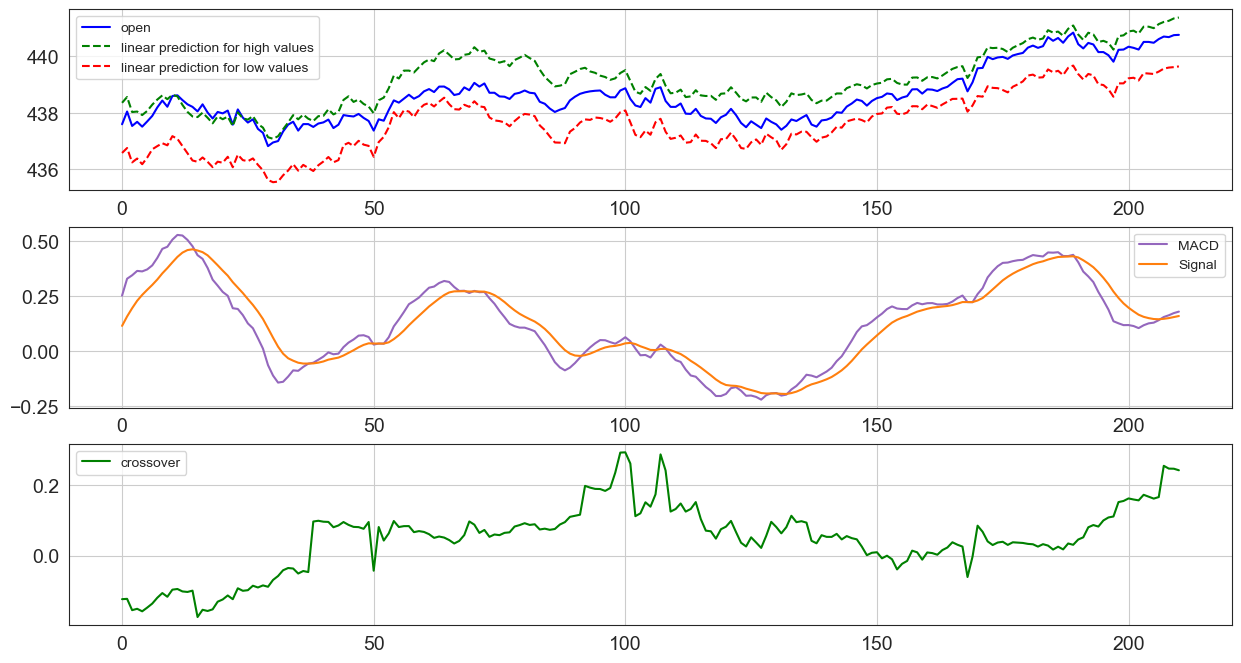

day 1 from 11:30 am to 3 pm


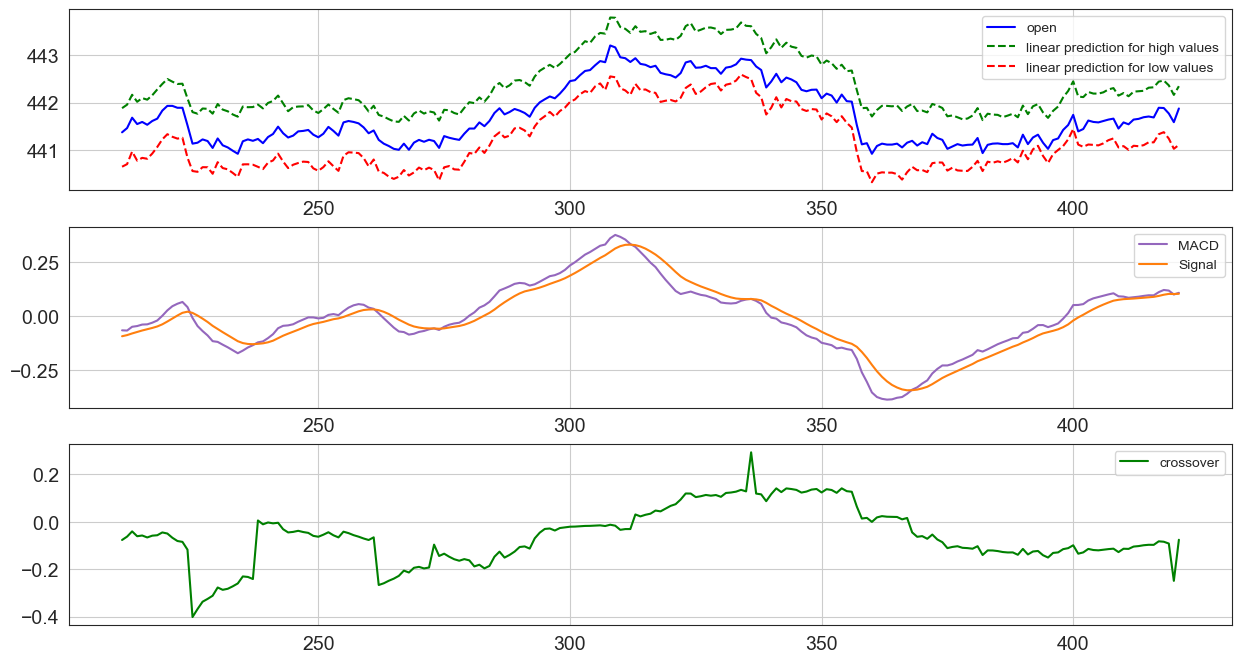

day 2 from 11:30 am to 3 pm


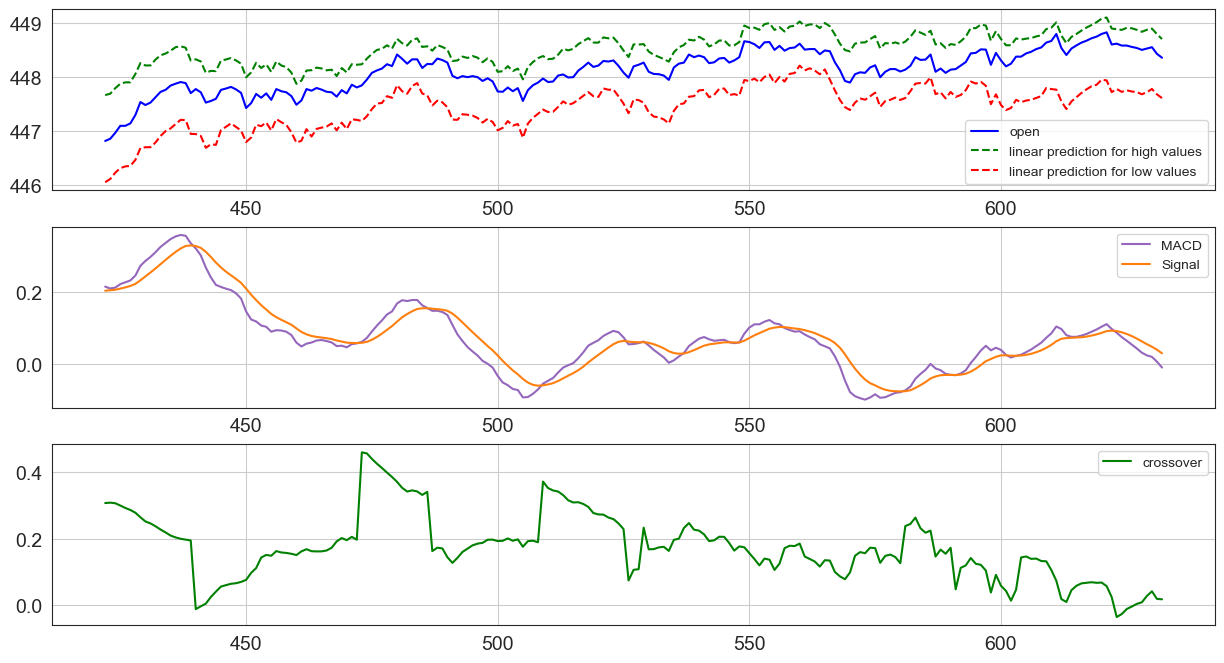

day 3 from 11:30 am to 3 pm


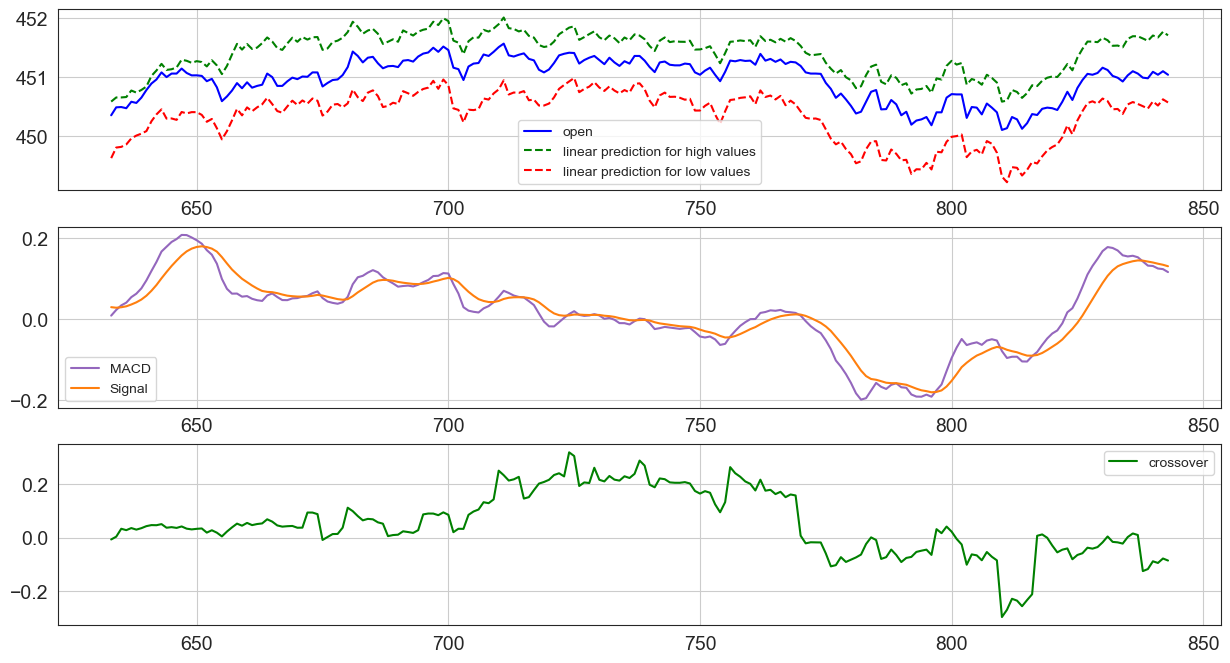

day 4 from 11:30 am to 3 pm


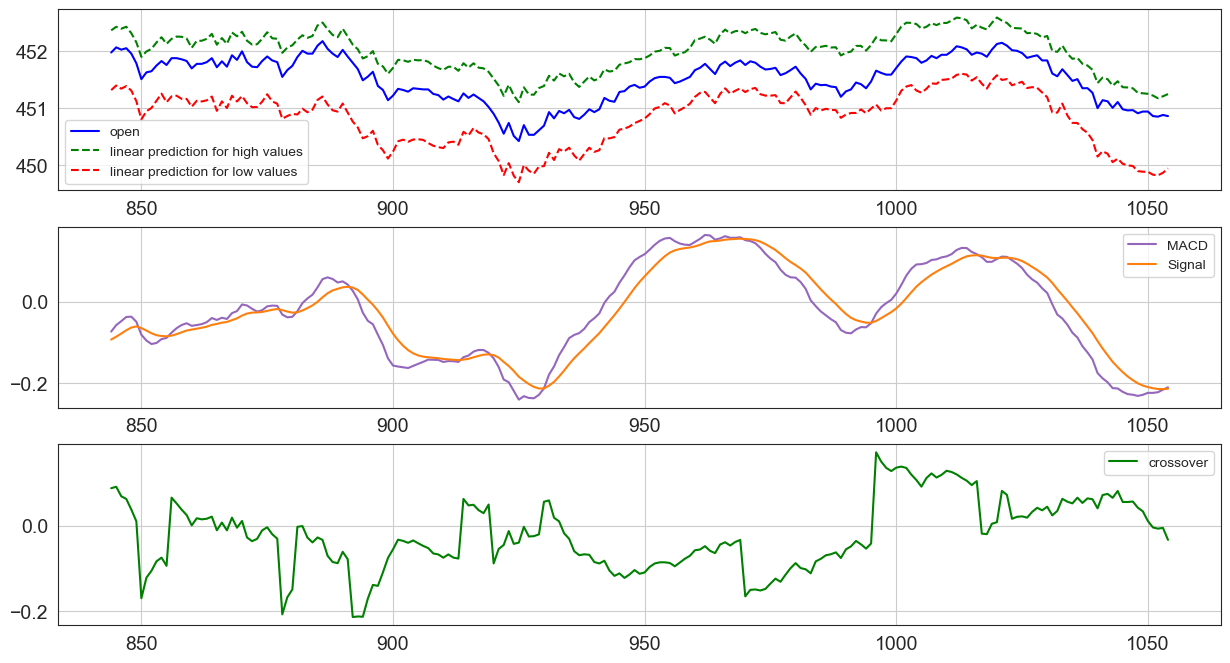

day 5 from 11:30 am to 3 pm


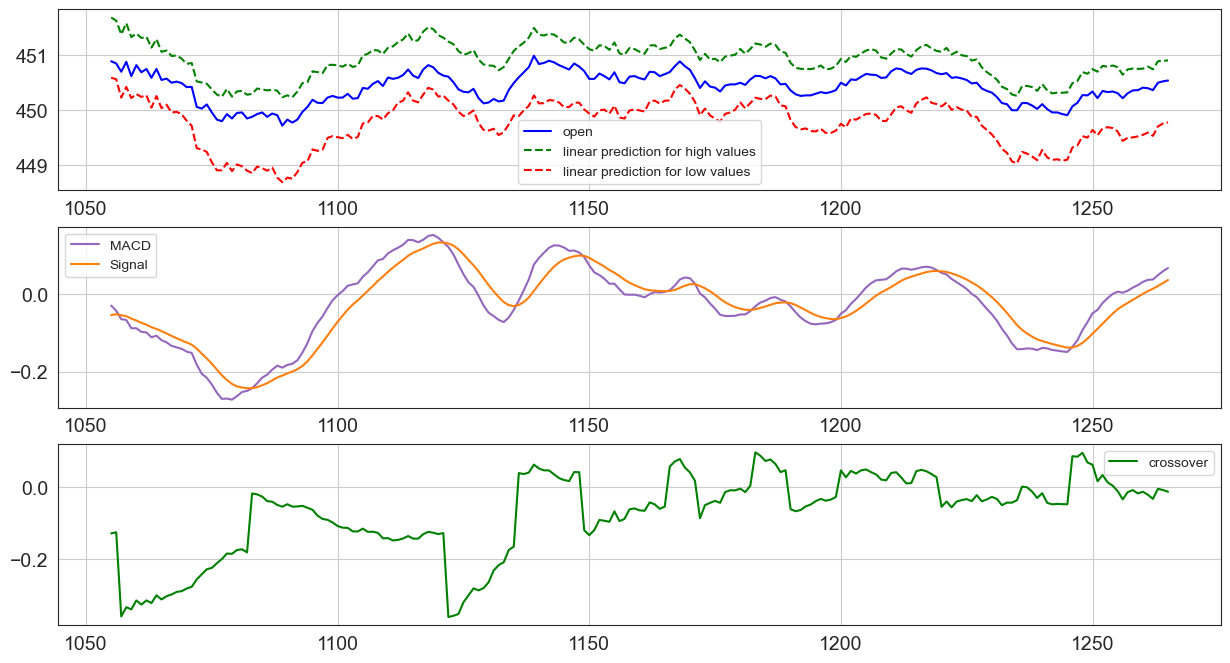

day 6 from 11:30 am to 3 pm


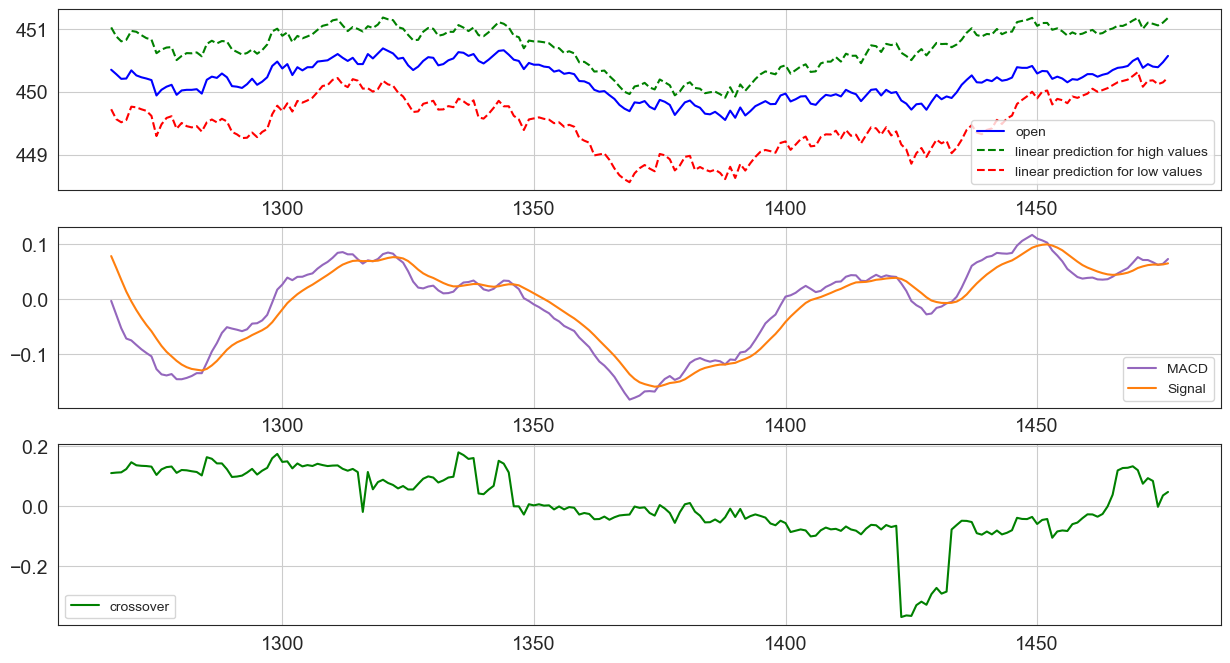

day 7 from 11:30 am to 3 pm


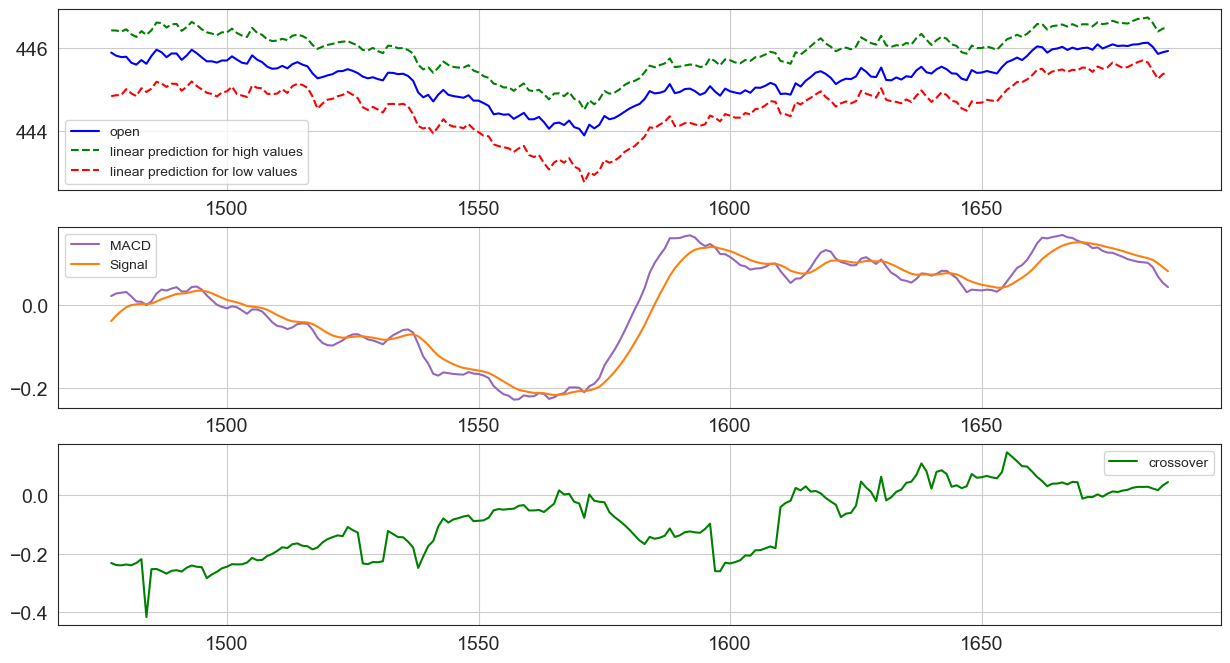

day 8 from 11:30 am to 3 pm


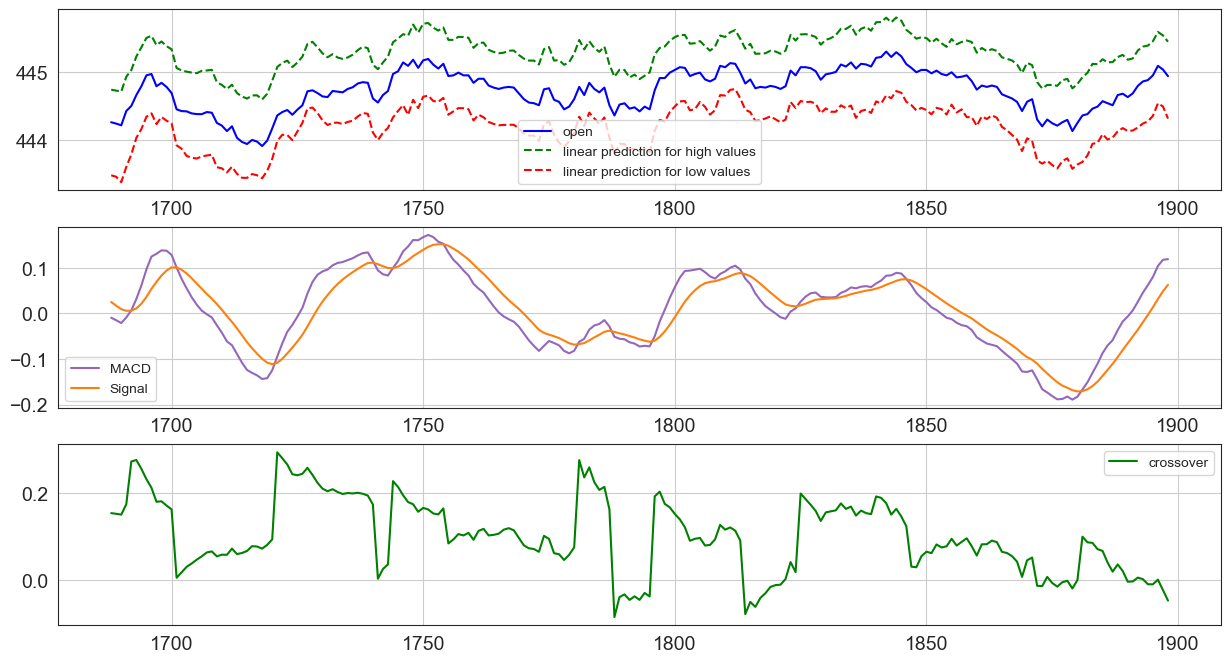

day 9 from 11:30 am to 3 pm


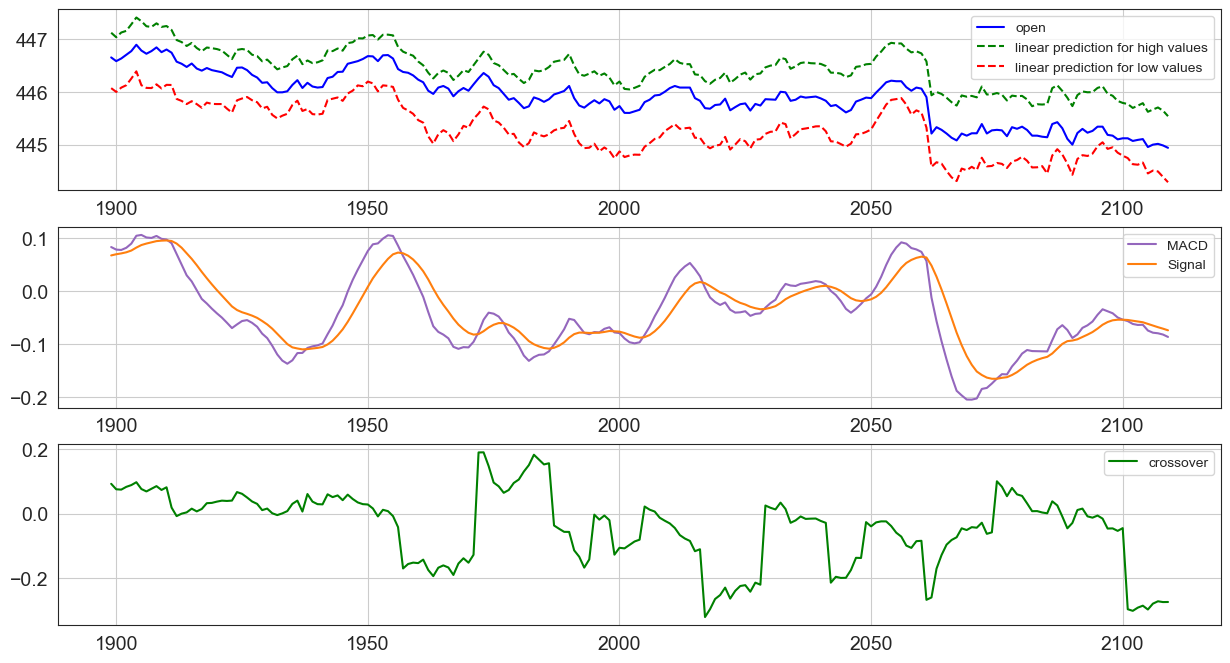

In [9]:
#Visualize the 'predicted' values for each test day
for i in range(n):
    print(f'day {i} from 11:30 am to 3 pm')

    fig, ax = plt.subplots(3,1, figsize = (15,8))
    ax[0].plot(X_test.index[211*i:211*(i+1)], X_test['open 119'].iloc[211*i:211*(i+1)],'b',label='open')
    ax[0].plot(X_test.index[211*i:211*(i+1)], predicted_high[211*i:211*(i+1)],'g--', label='linear prediction for high values')
    ax[0].plot(X_test.index[211*i:211*(i+1)], predicted_low[211*i:211*(i+1)],'r--', label='linear prediction for low values')
    ax[1].plot(X_test.index[211*i:211*(i+1)], X_test['MACD 119'].iloc[211*i:211*(i+1)],'C4',label='MACD')
    ax[1].plot(X_test.index[211*i:211*(i+1)], X_test['MACD_Signal 119'].iloc[211*i:211*(i+1)],'C1',label='Signal')
    ax[2].plot(X_test.index[211*i:211*(i+1)], X_test['crossover'].iloc[211*i:211*(i+1)],'g',label='crossover')
    for j in range(3):
        ax[j].tick_params(axis='both', which='major', labelsize=14) 
        ax[j].legend()
        ax[j].grid()
    plt.show()

In [75]:
# Backtesting 
def buy(df, buy_ratio, shares, usig, fund, cost):
    idx, wt = usig.pop(0)                  # usig stores the index and weight of the buying signals
    price = df.iloc[idx]['open']
    shares_change = math.floor(buy_ratio * wt * fund / price) # buy_ratio and weight determine the ratio of fund used for buying
    fund -= shares_change * price
    cost = (cost * shares + shares_change * price) / (shares + shares_change)  # update the average cost of current shares
    shares += shares_change
    return shares, fund, cost, idx

def sell(df, sell_ratio, shares, dsig, fund, P_L, cost):
    idx, wt = dsig.pop(0)                 # dsig stores the index and weight of the selling signals
    price = df.iloc[idx]['open']
    shares_change = math.floor(sell_ratio * wt * shares)  # sell_ratio and weight determine the ratio of shares for selling
    shares -= shares_change
    fund += shares_change * price
    P_L += shares_change * (price - cost)    # update the P&L based on the average cost of current shares
    return shares, fund, P_L, idx

def invest(fund, buy_ratio, sell_ratio, cool_down, usig, dsig, df):
    bcd = -cool_down - 1         # the latest buying index with initial value -cool_down-1
    scd = -cool_down - 1         # the latest selling index with initial value -cool_down-1
    scd_list = [0]               # the list containing selling indices for plotting P&L graph
    B_S = True                   # buy/sell state with True being buying and False being selling

    shares = 0                   # current shares held
    cost = 0                     # average cost for current shares
    P_L = 0                      # profit and loss
    P_L_list = [0]               # list of P&L for plotting P&L graph

    while len(usig) != 0 or len(dsig) != 0:
    
        if len(usig) == 0:                        # no buy signals left
            B_S = False
        elif len(dsig) == 0:                      # no sell signals left 
            B_S = True
        else:
            if usig[0][0] < dsig[0][0]:           # deal with earlier signal
                B_S = True
            else:
                B_S = False
        
        if B_S == True:
            if usig[0][0] - bcd < cool_down:        # if within the cool down time, ignore the signal
                usig.pop(0)
                continue
            else:
                shares, fund, cost, bcd = buy(df, buy_ratio, shares, usig, fund, cost)
    
        else:
            if dsig[0][0] - scd < cool_down or shares == 0:  # if within the cool down time or have no shares, ignore the signal
                dsig.pop(0)
                continue
            else:
                shares, fund, P_L, scd = sell(df, sell_ratio, shares, dsig, fund, P_L, cost)
                P_L_list.append(P_L)   
                scd_list.append(scd)
        
    return P_L_list, scd_list, fund, shares, cost

# adjusting buy_ratio, sell_ratio, cool_down to find the optimized parameter
def optimization(initial_fund, usig, dsig, df):
    max_P_L, best_buy, best_sell, best_cool, best_shares, best_cost = 0, 0, 0, 0, 0, 0
    max_P_L_list, max_scd_list = [], []
    
    for buy_ratio in [0.1+0.1*n for n in range(10)]:
        for sell_ratio in [0.1+0.1*n for n in range(10)]:
            for cool_down in range(12, 42, 2):

                fund = initial_fund
                P_L_list, scd_list, fund, shares, cost = invest(fund, buy_ratio, sell_ratio, cool_down, 
                                                                deepcopy(usig), deepcopy(dsig), df)

                if P_L_list[-1] > max_P_L:
                    max_P_L, best_buy, best_sell, best_cool = P_L_list[-1], buy_ratio, sell_ratio, cool_down
                    max_P_L_list, max_scd_list = P_L_list, scd_list
                    
    return max_P_L, best_buy, best_sell, best_cool, max_P_L_list, max_scd_list, shares, cost


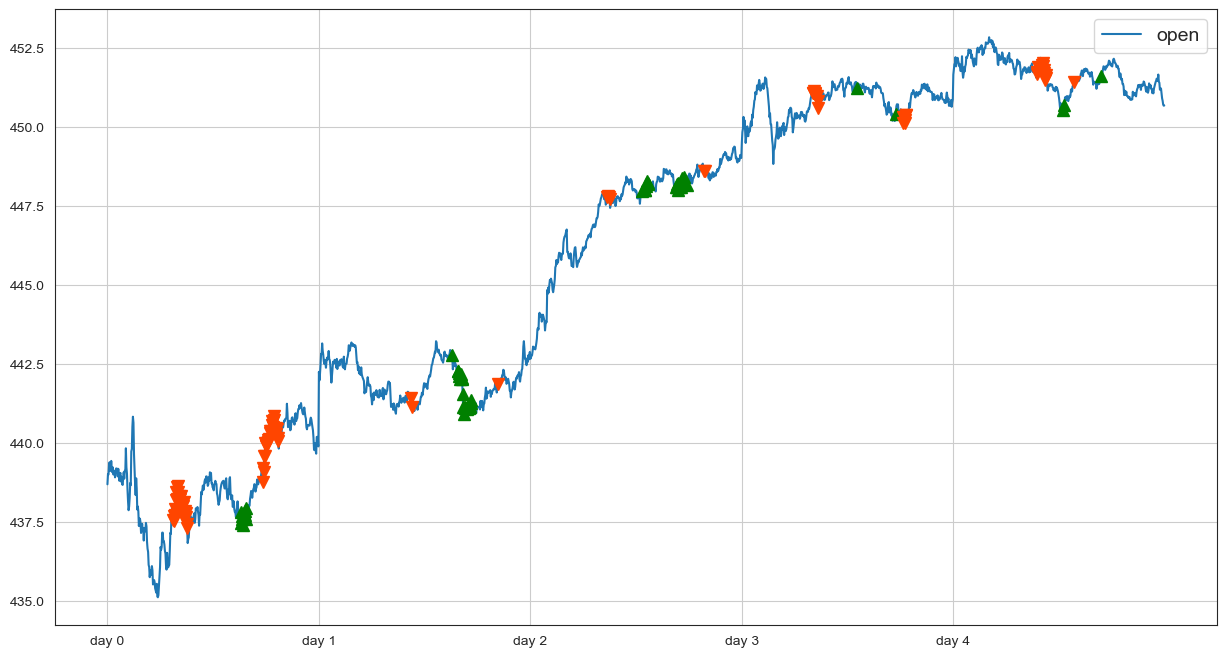

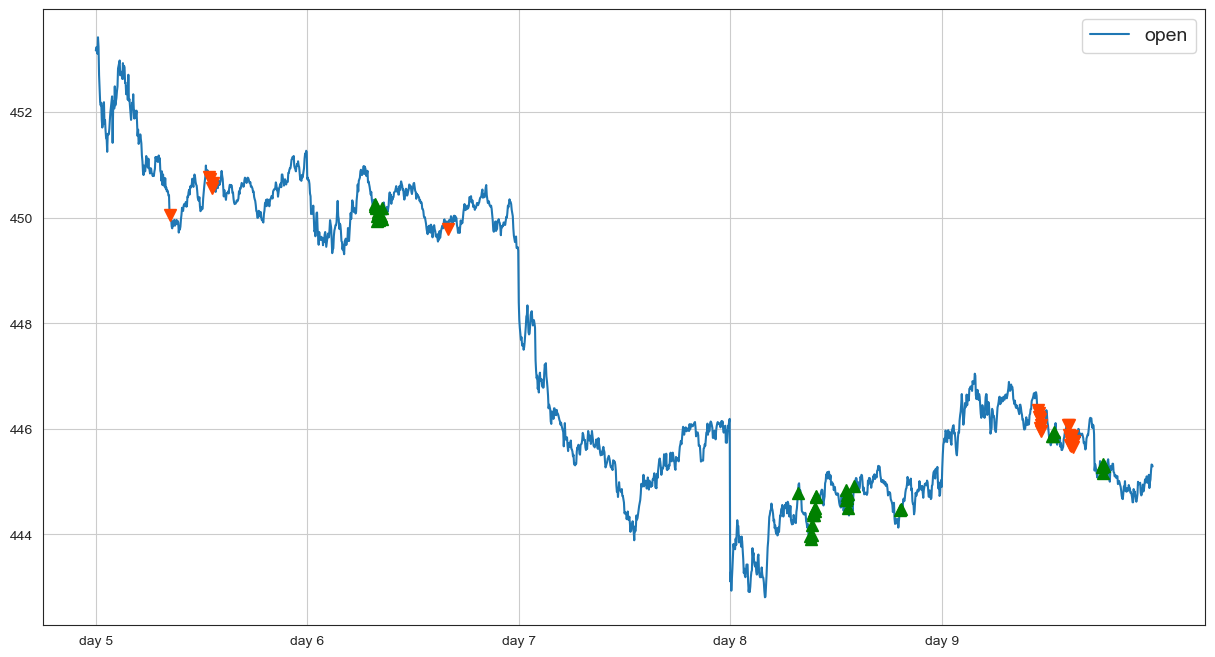

In [72]:
#Make a strategy and apply it to our test data (the last 10 days from 11:30 am to 3 pm)

#get the full data from 9:30 am to 4 pm
dfhlr = pd.read_csv('data/dfhlr.csv', parse_dates=['time'])
X_test_full = dfhlr.iloc[:390*n]
X_test_full = X_test_full.iloc[::-1].reset_index(drop=True)

#going-up indices and weights
uidx = X_test[(predicted_high / X_test['open 119'] > 1.001) & (predicted_low / X_test['open 119'] > 0.9985) &
              (X_test['crossover'] - X_test['MACD 119']>0.2)].index
uweight = [1 for idx in uidx]       # constent weight here 
umax = max(uweight)                 # one can adjust the weight using specific weighting strategy
uweight = [weight / umax for weight in uweight]

#going-down indices and weights
didx = X_test[(predicted_high / X_test['open 119'] < 1.0012) & (predicted_low / X_test['open 119'] < 0.9985) &
              (X_test['crossover'] - X_test['MACD 119'] < -0.1)].index
dweight = [1 for idx in didx]       # constent weight here 
dmax = max(dweight)                 # one can adjust the weight using specific weighting strategy
dweight = [weight / dmax for weight in dweight]

#transform the index to be consistant with the full day index
uidx = list(map(lambda x: (x//211)*390+120+(x%211), uidx))
didx = list(map(lambda x: (x//211)*390+120+(x%211), didx))

# construct signals
usig = list(zip(uidx, uweight))
dsig = list(zip(didx, dweight))

#plot two graphs visualizing the signals among 10 days
half_len = (n//2)*390
uidx1 = [x for x in uidx if x < half_len]
uidx2 = [x for x in uidx if x >= half_len]
didx1 = [x for x in didx if x < half_len]
didx2 = [x for x in didx if x >= half_len]

plt.figure(figsize = (15,8))
plt.plot(X_test_full.index[:half_len], X_test_full['open'].iloc[:half_len], label='open')
plt.plot(uidx1, [X_test_full.loc[t]['open'] for t in uidx1], marker='^', color='green', linestyle='none', markersize=8)
plt.plot(didx1, [X_test_full.loc[t]['open'] for t in didx1], marker='v', color='orangered', linestyle='none', markersize=8)
plt.legend(fontsize=14)
#Set xticks
xticks = [390 * i for i in range(n//2)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.grid()
plt.show()

plt.figure(figsize = (15,8))
plt.plot(X_test_full.index[half_len:], X_test_full['open'].iloc[half_len:], label='open')
plt.plot(uidx2, [X_test_full.loc[t]['open'] for t in uidx2], marker='^', color='green', linestyle='none', markersize=8)
plt.plot(didx2, [X_test_full.loc[t]['open'] for t in didx2], marker='v', color='orangered', linestyle='none', markersize=8)
plt.legend(fontsize=14)
#Set xticks
xticks = [390 * i for i in range(n//2,n)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.grid()
plt.show()

P_L: 9540.19
buy_ratio: 1.0
sell_ratio: 0.2
cool_down: 30
current shares: 1125
current cost: 445.27


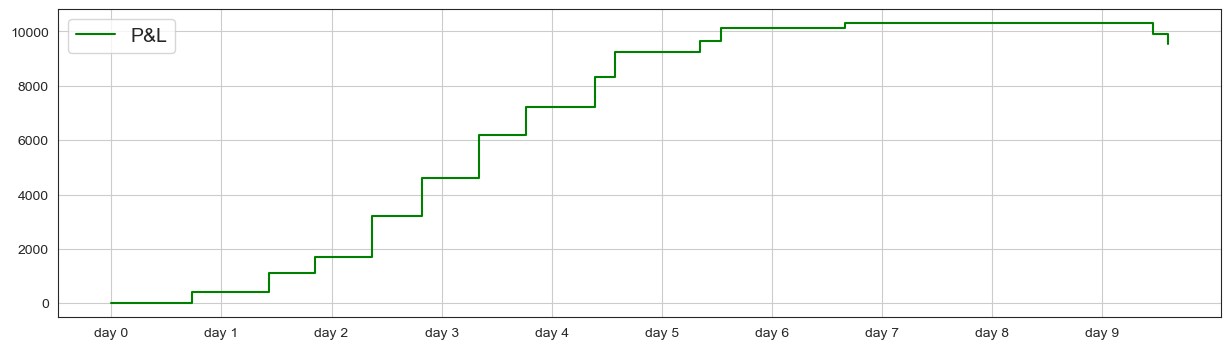

In [61]:
# Backtest the strategy for the last 10 days
fund = 500000
max_P_L, best_buy, best_sell, best_cool, max_P_L_list, max_scd_list, shares, cost = optimization(fund, usig, dsig, X_test_full)

print(f'P_L: {max_P_L:.2f}')
print(f'buy_ratio: {best_buy:.1f}')
print(f'sell_ratio: {best_sell:.1f}')
print('cool_down:', best_cool)
print('current shares:', shares)
print(f'current cost: {cost:.2f}')

# Plot the P&L graph for the first 5 days since there is no selling signal during the next 5 days
plt.figure(figsize = (15,4))
plt.plot(max_scd_list, max_P_L_list, drawstyle='steps-post', label='P&L', color='green')
plt.legend(fontsize=14)
#Set xticks
xticks = [390 * i for i in range(n)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.grid()
plt.show()


In [73]:
# Backtest the strategy for the whole training set
X = X_train_raw

predicted_high = linearh.predict(X)
predicted_low = linearl.predict(X)

#going-up indices and weights
uidx = X[(predicted_high / X['open 119'] > 1.001) & (predicted_low / X['open 119'] > 0.9985) &
              (X['crossover'] - X['MACD 119']>0.2)].index
uweight = [1 for idx in uidx]         # constant weight
umax = max(uweight)
uweight = [weight / umax for weight in uweight]

#going-down indices and weights
didx = X[(predicted_high / X['open 119'] < 1.0012) & (predicted_low / X['open 119'] < 0.9985) &
              (X['crossover'] - X['MACD 119'] < -0.1)].index
dweight = [1 for idx in didx]        # constant weight
dmax = max(dweight)
dweight = [weight / dmax for weight in dweight]

#transform the index to be consistant with the full day index
uidx = list(map(lambda x: (x//211)*390+120+(x%211), uidx))
didx = list(map(lambda x: (x//211)*390+120+(x%211), didx))

# construct signals
usig = list(zip(uidx, uweight))
dsig = list(zip(didx, dweight))

X_full = pd.read_csv('data/dfhlr.csv', parse_dates=['time'])
X_full = X_full.iloc[:int(len(X)*390/211)][::-1].reset_index(drop=True)
X_full

time     open     volume    MACD  MACD_Hist  MACD_Signal  \
0     2023-06-09 09:30:00  429.960   644837.0  0.1008     0.0095       0.0914   
1     2023-06-09 09:31:00  429.940   272040.0  0.1013     0.0080       0.0933   
2     2023-06-09 09:32:00  430.230   181683.0  0.1237     0.0242       0.0994   
3     2023-06-09 09:33:00  430.240   211711.0  0.1405     0.0329       0.1076   
4     2023-06-09 09:34:00  430.180   255978.0  0.1474     0.0318       0.1156   
...                   ...      ...        ...     ...        ...          ...   
24565 2023-09-08 15:55:00  445.040   425624.0  0.0448     0.0012       0.0437   
24566 2023-09-08 15:56:00  445.200   378042.0  0.0582     0.0116       0.0466   
24567 2023-09-08 15:57:00  445.325  1101354.0  0.0780     0.0251       0.0529   
24568 2023-09-08 15:58:00  445.320  1126246.0  0.0922     0.0315       0.0607   
24569 2023-09-08 15:59:00  445.290  2172819.0  0.0999     0.0313       0.0686   

          high     low  return    hrate%    lrate%    rrate%  
0      431.880  429.94  431.82  0.446553 -0.004652  0.432598  
1      431.880  429.94  431.79  0.451226  0.000000  0.430293  
2      431.910  430.08  431.91  0.390489 -0.034865  0.390489  
3      431.910  430.08  431.88  0.388155 -0.037189  0.381183  
4      431.910  430.08  431.91  0.402157 -0.023246  0.402157  
...        ...     ...     ...       ...       ...       ...  
24565  445.325  445.04  445.29  0.064039  0.000000  0.056175  
24566  445.325  445.20  445.29  0.028077  0.000000  0.020216  
24567  445.325  445.29  445.29  0.000000 -0.007859 -0.007859  
24568  445.320  445.29  445.29  0.000000 -0.006737 -0.006737  
24569  445.290  445.29  445.29  0.000000  0.000000  0.000000  

[24570 rows x 12 columns]

P_L: 29034.43
buy_ratio: 0.9
sell_ratio: 0.3
cool_down: 34
current shares: 1170
current cost: 445.27


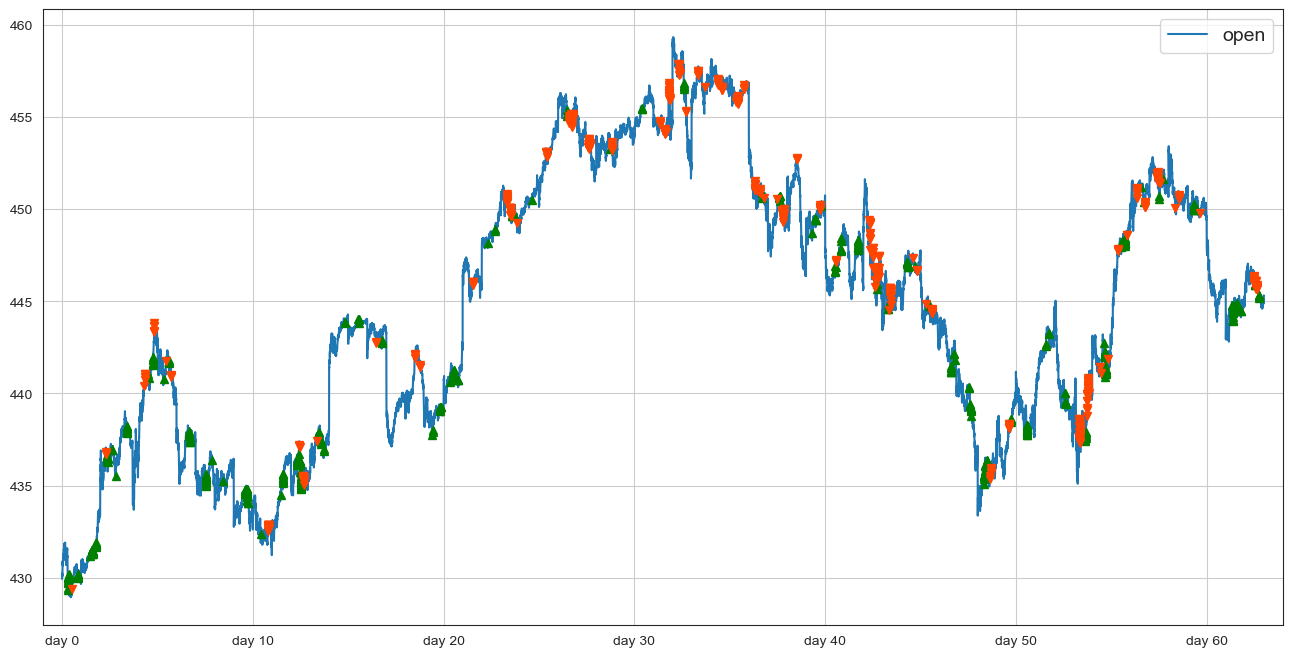

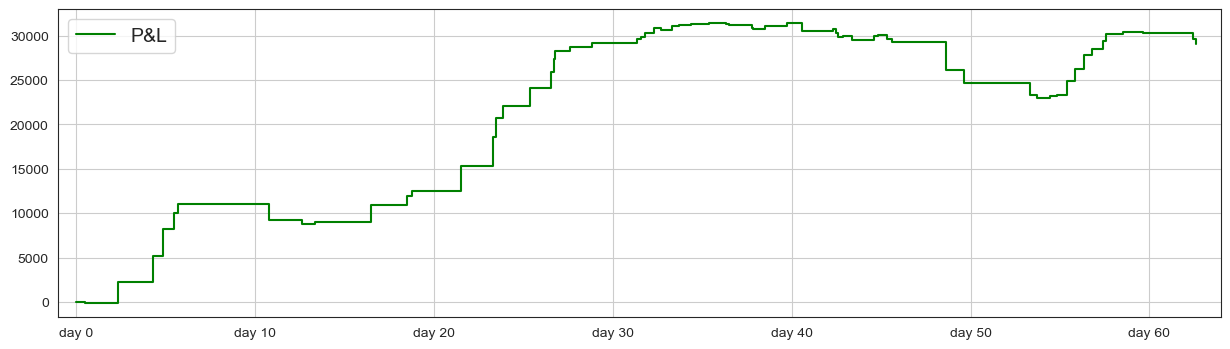

In [79]:
# Backtest the strategy for the whole training set
fund = 500000
max_P_L, best_buy, best_sell, best_cool, max_P_L_list, max_scd_list, shares, cost = optimization(fund, usig, dsig, X_full)

print(f'P_L: {max_P_L:.2f}')
print(f'buy_ratio: {best_buy:.1f}')
print(f'sell_ratio: {best_sell:.1f}')
print('cool_down:', best_cool)
print('current shares:', shares)
print(f'current cost: {cost:.2f}')

# Plot the graph visualizing the signals
plt.figure(figsize = (16,8))
plt.plot(X_full.index, X_full['open'], label='open')
plt.plot(uidx, [X_full.loc[t]['open'] for t in uidx], marker='^', color='green', linestyle='none', markersize=6)
plt.plot(didx, [X_full.loc[t]['open'] for t in didx], marker='v', color='orangered', linestyle='none', markersize=6)
plt.legend(fontsize=14)

#Set xticks
n = int(len(X_full) / 390)
xticks = [3900 * i for i in range((n//10)+1)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.xlim(-390, (n+1)*390)
plt.grid()
plt.show()

# Plot the P&L graph
plt.figure(figsize = (15,4))
plt.plot(max_scd_list, max_P_L_list, drawstyle='steps-post', label='P&L', color='green')
plt.legend(fontsize=14)

#Set xticks
xticks = [3900 * i for i in range((n//10)+1)]
plt.xticks(ticks=xticks, labels=[f'day {int(tick/390)}' for tick in xticks])
plt.xlim(-390, (n+1)*390)
plt.grid()
plt.show()
